In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from imblearn.over_sampling import SMOTE


In [28]:
file_path = "/Users/tanuj/Desktop/product_reviews_with_sentiment.csv"
df = pd.read_csv(file_path)

print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34627 entries, 0 to 34626
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      34627 non-null  int64 
 1   product_id      34627 non-null  int64 
 2   product_rating  34627 non-null  int64 
 3   product_review  34627 non-null  object
dtypes: int64(3), object(1)
memory usage: 1.1+ MB
None
   Unnamed: 0  product_id  product_rating  \
0           0        5326               5   
1           1        7933               5   
2           2        9719               5   
3           3        2232               4   
4           4        5989               5   

                                      product_review  
0  This product so far has not disappointed. My c...  
1  great for beginner or experienced person. Boug...  
2  Inexpensive tablet for him to use and learn on...  
3  I've had my Fire HD 8 two weeks now and I love...  
4  I bought this for my gra

In [29]:
df.drop(columns=["Unnamed: 0", "product_id"], inplace=True)
df = df[df['product_rating'] != 3]
df['sentiment'] = df['product_rating'].apply(lambda x: 1 if x >= 4 else 0)

print(df['sentiment'].value_counts())


sentiment
1    32316
0      812
Name: count, dtype: int64


In [30]:
X_train, X_val, y_train, y_val = train_test_split(
    df['product_review'], df['sentiment'], test_size=0.2, random_state=42
)

print(len(X_train), len(X_val))


26502 6626


In [31]:
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train)
X_val_tfidf = tfidf.transform(X_val)

print(X_train_tfidf.shape, X_val_tfidf.shape)


(26502, 5000) (6626, 5000)


In [32]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_tfidf, y_train)

print(sum(y_train_smote == 1), sum(y_train_smote == 0))


25863 25863


Logistic Regression (SMOTE) Accuracy: 0.9276
              precision    recall  f1-score   support

           0       0.22      0.69      0.33       173
           1       0.99      0.93      0.96      6453

    accuracy                           0.93      6626
   macro avg       0.61      0.81      0.65      6626
weighted avg       0.97      0.93      0.95      6626



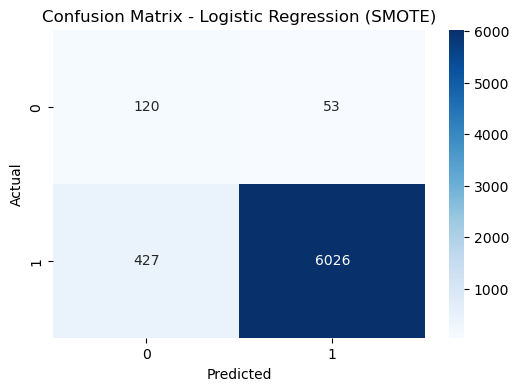

In [33]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_smote, y_train_smote)

y_pred_lr = lr_model.predict(X_val_tfidf)

conf_matrix_lr = confusion_matrix(y_val, y_pred_lr)
accuracy_lr = accuracy_score(y_val, y_pred_lr)
report_lr = classification_report(y_val, y_pred_lr)

print(f"Logistic Regression (SMOTE) Accuracy: {accuracy_lr:.4f}")
print(report_lr)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression (SMOTE)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Random Forest (SMOTE) Accuracy: 0.9734
              precision    recall  f1-score   support

           0       0.48      0.18      0.27       173
           1       0.98      0.99      0.99      6453

    accuracy                           0.97      6626
   macro avg       0.73      0.59      0.63      6626
weighted avg       0.97      0.97      0.97      6626



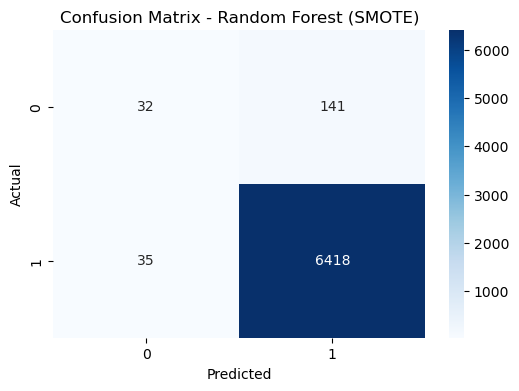

In [34]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_smote, y_train_smote)

y_pred_rf = rf_model.predict(X_val_tfidf)

conf_matrix_rf = confusion_matrix(y_val, y_pred_rf)
accuracy_rf = accuracy_score(y_val, y_pred_rf)
report_rf = classification_report(y_val, y_pred_rf)

print(f"Random Forest (SMOTE) Accuracy: {accuracy_rf:.4f}")
print(report_rf)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest (SMOTE)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:49:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost (SMOTE) Accuracy: 0.9565
              precision    recall  f1-score   support

           0       0.30      0.48      0.37       173
           1       0.99      0.97      0.98      6453

    accuracy                           0.96      6626
   macro avg       0.64      0.72      0.67      6626
weighted avg       0.97      0.96      0.96      6626



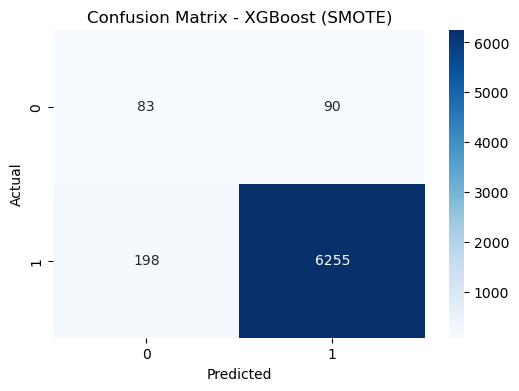

In [35]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_smote, y_train_smote)

y_pred_xgb = xgb_model.predict(X_val_tfidf)

conf_matrix_xgb = confusion_matrix(y_val, y_pred_xgb)
accuracy_xgb = accuracy_score(y_val, y_pred_xgb)
report_xgb = classification_report(y_val, y_pred_xgb)

print(f"XGBoost (SMOTE) Accuracy: {accuracy_xgb:.4f}")
print(report_xgb)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - XGBoost (SMOTE)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [36]:
print("--- Final Model Comparison ---")
print(f"Logistic Regression (SMOTE): Accuracy = {accuracy_lr:.4f}")
print(f"Random Forest (SMOTE): Accuracy = {accuracy_rf:.4f}")
print(f"XGBoost (SMOTE): Accuracy = {accuracy_xgb:.4f}")


--- Final Model Comparison ---
Logistic Regression (SMOTE): Accuracy = 0.9276
Random Forest (SMOTE): Accuracy = 0.9734
XGBoost (SMOTE): Accuracy = 0.9565
